In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [25]:
level = np.linspace(0,5,6)
depth = 5 
time = np.linspace(0,364,365)
omg = (2*math.pi)/20
omg2 = (2*math.pi)/5
A2 = 1
A1 = 0.3*A2

u = np.full((int(len(time)),int(len(level))),np.nan)
u.shape

(365, 6)

In [26]:
level

array([0., 1., 2., 3., 4., 5.])

In [27]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) + A2*math.cos((math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        

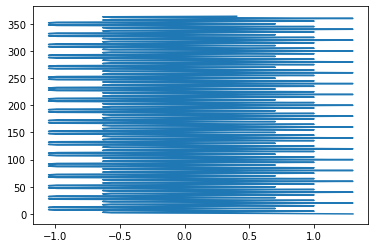

In [28]:
plt.plot(u[:,0],time)

In [29]:
u.shape

(365, 6)

In [30]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
print('values: ', values) 
print('------------------------------------------------------')    
print('values[0]: ', values[0])
print('------------------------------------------------------') 
print('vectors: ', vectors) 
print('------------------------------------------------------')
print('vectors[0]: ', vectors[0]) 

order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[:, order]

print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

print(cov.shape) 
print('cov :', cov)
print('------------------------------------------------------')    
print('values: ',values_) 
print('------------------------------------------------------')    
print('values[0]: ',values_[0]) 
print('------------------------------------------------------')    
print('vectors: ',vectors_) 
print('------------------------------------------------------') 
print('vectors[0]: ',vectors_[0]) 

values:  [ 1.90939202e+00 -9.48046574e-16 -1.04871849e-17  9.64797185e-17
  1.87116043e-17 -2.14126742e-17]
------------------------------------------------------
values[0]:  1.9093920236343531
------------------------------------------------------
vectors:  [[-5.34522484e-01  4.66853293e-01 -6.93752708e-01  2.26362573e-02
   1.34628758e-02 -1.99452450e-02]
 [-4.32437773e-01 -5.34595582e-01 -3.82641515e-02  6.78538409e-01
   8.14763485e-02  1.76482637e-01]
 [-1.65176531e-01 -1.55048692e-01  1.90585612e-02 -2.20285292e-02
  -7.34390963e-01 -5.53799330e-01]
 [ 1.65176531e-01  1.35244317e-01 -3.26275960e-02  4.91024366e-01
   5.66652124e-01 -7.78072866e-01]
 [ 4.32437773e-01  4.95656255e-01  1.15846716e-02  5.44719074e-01
  -3.63214980e-01  2.37413099e-01]
 [ 5.34522484e-01 -4.56343425e-01 -7.18109352e-01 -2.76436897e-02
  -2.88187066e-02  6.53096404e-05]]
------------------------------------------------------
vectors[0]:  [-0.53452248  0.46685329 -0.69375271  0.02263626  0.01346288 -0.01

In [31]:
print(values[0])
print('---------------------')
print(values_[0])

1.9093920236343531
---------------------
1.9093920236343531


In [32]:
print(values)
print('---------------------')
print(values_)

[ 1.90939202e+00 -9.48046574e-16 -1.04871849e-17  9.64797185e-17
  1.87116043e-17 -2.14126742e-17]
---------------------
[ 1.90939202e+00  9.64797185e-17  1.87116043e-17 -1.04871849e-17
 -2.14126742e-17 -9.48046574e-16]


In [33]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.46685329 -0.69375271  0.02263626  0.01346288 -0.01994524]
---------------------
[-0.53452248  0.02263626  0.01346288 -0.69375271 -0.01994524  0.46685329]


In [34]:
print(vectors)
print('---------------------')
print(vectors_)

[[-5.34522484e-01  4.66853293e-01 -6.93752708e-01  2.26362573e-02
   1.34628758e-02 -1.99452450e-02]
 [-4.32437773e-01 -5.34595582e-01 -3.82641515e-02  6.78538409e-01
   8.14763485e-02  1.76482637e-01]
 [-1.65176531e-01 -1.55048692e-01  1.90585612e-02 -2.20285292e-02
  -7.34390963e-01 -5.53799330e-01]
 [ 1.65176531e-01  1.35244317e-01 -3.26275960e-02  4.91024366e-01
   5.66652124e-01 -7.78072866e-01]
 [ 4.32437773e-01  4.95656255e-01  1.15846716e-02  5.44719074e-01
  -3.63214980e-01  2.37413099e-01]
 [ 5.34522484e-01 -4.56343425e-01 -7.18109352e-01 -2.76436897e-02
  -2.88187066e-02  6.53096404e-05]]
---------------------
[[-5.34522484e-01  2.26362573e-02  1.34628758e-02 -6.93752708e-01
  -1.99452450e-02  4.66853293e-01]
 [-4.32437773e-01  6.78538409e-01  8.14763485e-02 -3.82641515e-02
   1.76482637e-01 -5.34595582e-01]
 [-1.65176531e-01 -2.20285292e-02 -7.34390963e-01  1.90585612e-02
  -5.53799330e-01 -1.55048692e-01]
 [ 1.65176531e-01  4.91024366e-01  5.66652124e-01 -3.26275960e-02
  

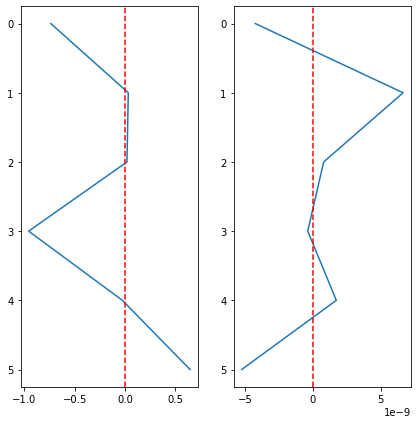

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [36]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

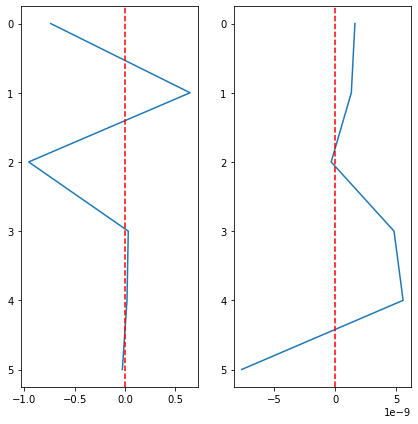

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [15]:
print(values[0])
print('---------------------')
print(values_[0])

1.9093920236343531
---------------------
1.9093920236343531


In [16]:
print(vectors[0])
print('---------------------')
print(vectors_[0])

[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]
---------------------
[-0.53452248  0.46658371  0.69337194 -0.00432018  0.00888919 -0.00572109]


# en bølge

In [41]:
for t in range(len(time)): 
    for z in range(len(level)): 
        u[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) #+ A2*math.cos((math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        

In [42]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[:, order]

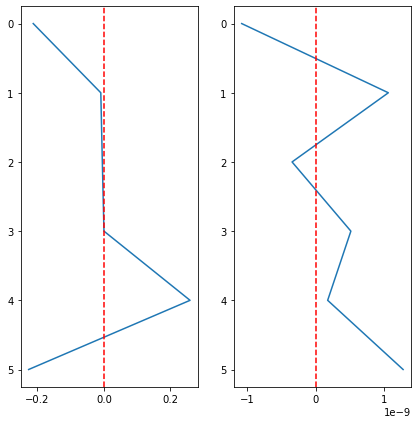

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

In [44]:
cov = np.cov(u.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov)
order = values.argsort()[::-1]
values_, vectors_ = values[order], vectors[order,:]

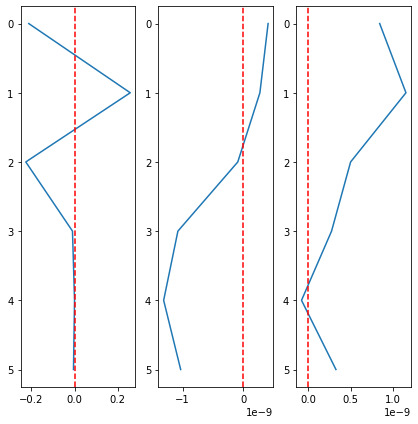

In [46]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize = (7,7))

ax1.plot(vectors_[0]*np.sqrt(values_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors_[1]*np.sqrt(values_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

ax3.plot(vectors_[2]*np.sqrt(values_[2]),level)
ax3.axvline(0, color='r', linestyle = '--')
ax3.invert_yaxis()